In [9]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## 新增column至dataframe

In [79]:
df = pd.DataFrame({'B': [1, 2, 3], 'C': [4, 5, 6]})
df

,B,C
0,1,4
1,2,5
2,3,6


In [81]:
idx = len(df.columns)
new_col = [7, 8, 9]  # can be a list, a Series, an array or a scalar   
df.insert(loc=idx, column='A', value=new_col)
df

,B,C,A
0,1,4,7
1,2,5,8
2,3,6,9


## 篩選數據

In [91]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', 
                 '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071',
                 '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', 
                 '2014-05-03 18:27:05.332662', '2014-05-03 18:47:05.385109',
                 '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877', 
                 '2015-05-04 18:47:05.486877'], 
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41, 50]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
df

,date,battle_deaths
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:27:05.332662,26
7,2014-05-03 18:47:05.385109,25
8,2014-05-04 18:47:05.436523,62
9,2014-05-04 18:47:05.486877,41


In [93]:
#使用一個以上的過濾條件來篩選數據
data = df[(df['battle_deaths'] > 20) & (df['battle_deaths'] < 40) ]
data

,date,battle_deaths
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
6,2014-05-03 18:27:05.332662,26
7,2014-05-03 18:47:05.385109,25


In [101]:
# 篩選死亡人數大於20且不等於62的數據
data = df[(df['battle_deaths'] >= 25) & (df['battle_deaths'] !=62)]
data

,date,battle_deaths
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
6,2014-05-03 18:27:05.332662,26
7,2014-05-03 18:47:05.385109,25
9,2014-05-04 18:47:05.486877,41
10,2015-05-04 18:47:05.486877,50


In [102]:
#練習區

## 處理遺失值

In [24]:
f = pd.DataFrame([[0, 2, np.nan, 0],
                    [3, 4, 10, 1],
                    [np.nan, np.nan, np.nan, np.nan],
                    [np.nan, 3, np.nan, 4]],
                    columns=list('ABCD'))
f

,A,B,C,D
0,0.0,2.0,NaN,0.0
1,3.0,4.0,10.0,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [28]:
# 將遺失值用各column的平均值填補
f.mean()

A     1.500000
B     3.000000
C    10.000000
D     1.666667
dtype: float64

In [29]:
f_fillna_mean = f.fillna(f.mean())
f_fillna_mean

,A,B,C,D
0,0.0,2.0,10.0,0.000000
1,3.0,4.0,10.0,1.000000
2,1.5,3.0,10.0,1.666667
3,1.5,3.0,10.0,4.000000


In [30]:
# 遺失值用各column的中位數填補
f.median()

A     1.5
B     3.0
C    10.0
D     1.0
dtype: float64

In [38]:
#找出B欄位中的眾數
f['B'].value_counts().index[0]

3.0

In [33]:
# 遺失值根據出現頻率最高的樹值來填補

df = f.apply(lambda x:x.fillna(x.value_counts().index[0]))
df

,A,B,C,D
0,0.0,2.0,10.0,0.0
1,3.0,4.0,10.0,1.0
2,3.0,3.0,10.0,4.0
3,3.0,3.0,10.0,4.0


## lambda 的詳細介紹
https://openhome.cc/Gossip/Python/LambdaExpression.html

In [ ]:
#練習區

## 梯度下降法

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


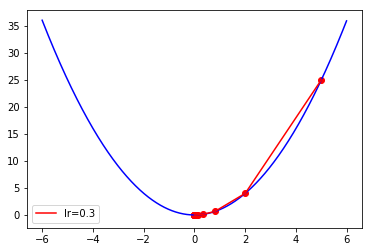

In [106]:
# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def Gradient(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs


# 起始權重
x_start = 5    
# 執行週期數
epochs = 15 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = Gradient(x_start, dfunc, epochs, lr=lr) 
print (x)

color = 'r'    
  
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

## 標準化

In [112]:
# 使用scale函數
from sklearn import preprocessing

X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])

print('--------------X經過標準化前------------')
print(X)

X_scaled = preprocessing.scale(X)

print('--------------X經過標準化後------------')
print(X_scaled)       

--------------X經過標準化前------------
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
--------------X經過標準化後------------
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [113]:
# 使用standardscaler
# standardscaler會保存訓練樣本的平均值以及標準差的參數，使我們能直接運用在測試樣本上

scaler = preprocessing.StandardScaler().fit(X)

scaler.transform(X)    

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [115]:
#使用mixmaxscaler將特徵取值壓縮在[0,1]區間內

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [7]:
#將特徵的取值範圍壓縮在[0, 1]區間

from sklearn.preprocessing import MinMaxScaler

X_train= np.array([[ 1., -1.,  2.],  
                    [ 2.,  0., 0.],  
                    [ 0.,  1., -1.]])  
  
min_max_scaler = MinMaxScaler()  
X_train_minmax = min_max_scaler.fit_transform(X_train)  
X_train_minmax  


array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

## 特徵轉換

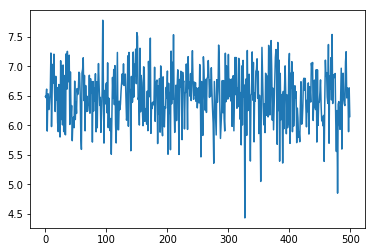

In [10]:
# log tranformation

x = stats.loggamma.rvs(5, size=500) + 5
plt.plot(x)

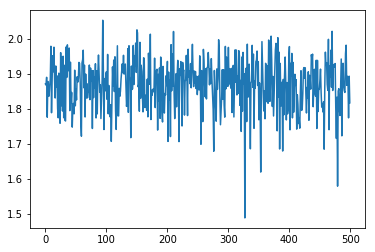

In [11]:
x = np.log(x)
plt.plot(x)

Text(0.5,1,'Probplot after Box-Cox transformation')

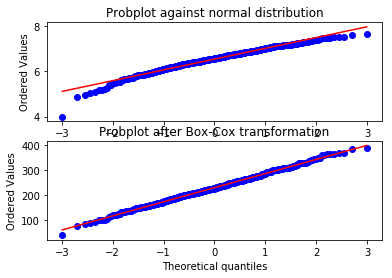

In [12]:
# box-cox transformation

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

## 讀取資料

In [211]:
data = pd.read_table('DN_Billing.txt', names=['編號', '遊戲名稱', '遊戲帳號', '儲值金額', '儲值時間','儲值序號', 'x', 'xx'])
data.head()

,編號,遊戲名稱,遊戲帳號,儲值金額,儲值時間,儲值序號,x,xx
0,659885,新龍之谷,gfp000003217945,1000,2017-01-01 00:04:26.000,BDN170101000000002,新龍之谷2017010100,2017-01-01 00:00:00.000
1,659886,新龍之谷,gfp000003217945,1000,2017-01-01 00:10:08.000,BDN170101000000004,新龍之谷2017010100,2017-01-01 00:00:00.000
2,659887,新龍之谷,gfp000001127797,1000,2017-01-01 00:10:58.000,MCKVJG0000086105,新龍之谷2017010100,2017-01-01 00:00:00.000
3,659888,新龍之谷,gfp000001127797,1000,2017-01-01 00:11:49.000,MCKVJG0000086106,新龍之谷2017010100,2017-01-01 00:00:00.000
4,659889,新龍之谷,gfp000003217945,1000,2017-01-01 00:16:40.000,BDN170101000000005,新龍之谷2017010100,2017-01-01 00:00:00.000


In [212]:
df = data.drop(['遊戲名稱','編號', 'x', 'xx'], axis=1)
df.head()

,遊戲帳號,儲值金額,儲值時間,儲值序號
0,gfp000003217945,1000,2017-01-01 00:04:26.000,BDN170101000000002
1,gfp000003217945,1000,2017-01-01 00:10:08.000,BDN170101000000004
2,gfp000001127797,1000,2017-01-01 00:10:58.000,MCKVJG0000086105
3,gfp000001127797,1000,2017-01-01 00:11:49.000,MCKVJG0000086106
4,gfp000003217945,1000,2017-01-01 00:16:40.000,BDN170101000000005


## Binning

In [213]:
df.loc[df['儲值金額']<5000, '儲值金額低於5000']=1
df.loc[(df['儲值金額']> 5000)& (df['儲值金額']<10000), '儲值金額介於5000到10000'] =1
df.head()

,遊戲帳號,儲值金額,儲值時間,儲值序號,儲值金額低於5000,儲值金額介於5000到10000
0,gfp000003217945,1000,2017-01-01 00:04:26.000,BDN170101000000002,1.0,NaN
1,gfp000003217945,1000,2017-01-01 00:10:08.000,BDN170101000000004,1.0,NaN
2,gfp000001127797,1000,2017-01-01 00:10:58.000,MCKVJG0000086105,1.0,NaN
3,gfp000001127797,1000,2017-01-01 00:11:49.000,MCKVJG0000086106,1.0,NaN
4,gfp000003217945,1000,2017-01-01 00:16:40.000,BDN170101000000005,1.0,NaN


## One hot Encoding

In [174]:
df = pd.get_dummies(df, columns=['遊戲帳號'])
df.head()

,儲值金額,儲值時間,儲值序號,遊戲帳號_gfp000000000082,遊戲帳號_gfp000000000272,遊戲帳號_gfp000000000508,遊戲帳號_gfp000000000800,遊戲帳號_gfp000000002535,遊戲帳號_gfp000000002654,遊戲帳號_gfp000000007785,...,遊戲帳號_gfp000004588689,遊戲帳號_gfp000004588779,遊戲帳號_gfp000004588992,遊戲帳號_gfp000004589922,遊戲帳號_gfp000004590117,遊戲帳號_gfp000004590144,遊戲帳號_gfp000004590273,遊戲帳號_gfp000004590393,遊戲帳號_gfp000004590444,遊戲帳號_gfp000004590480
0,6.907755,2017-01-01 00:04:26.000,BDN170101000000002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.907755,2017-01-01 00:10:08.000,BDN170101000000004,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.907755,2017-01-01 00:10:58.000,MCKVJG0000086105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.907755,2017-01-01 00:11:49.000,MCKVJG0000086106,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.907755,2017-01-01 00:16:40.000,BDN170101000000005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
# one hot encoding後欄位長度
df.columns.shape

(6069,)